In [1]:
import requests
import matplotlib.pyplot as plt
response = requests.get("http://127.0.0.1:9874/cars")
car_data = response.json()

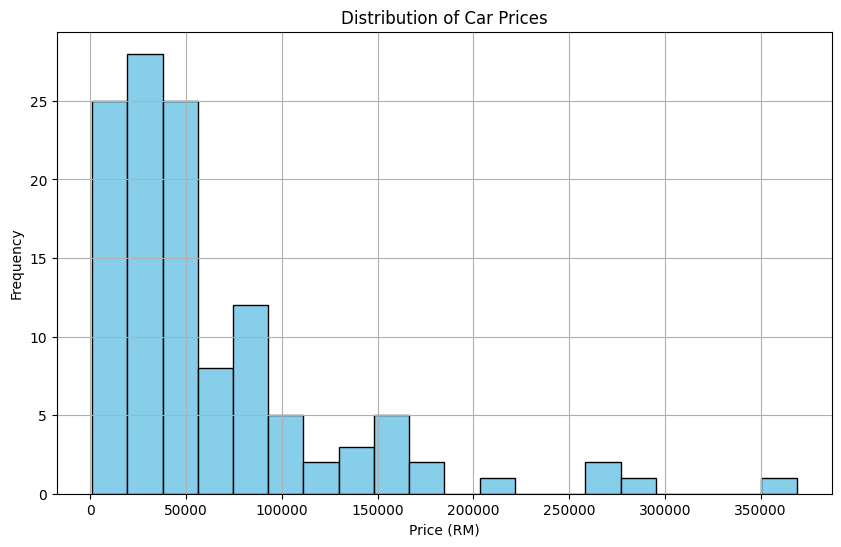

In [2]:
prices = [
    int(car["price"].replace(",", "").replace("RM", "").strip()) for car in car_data
]
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Car Prices")
plt.xlabel("Price (RM)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

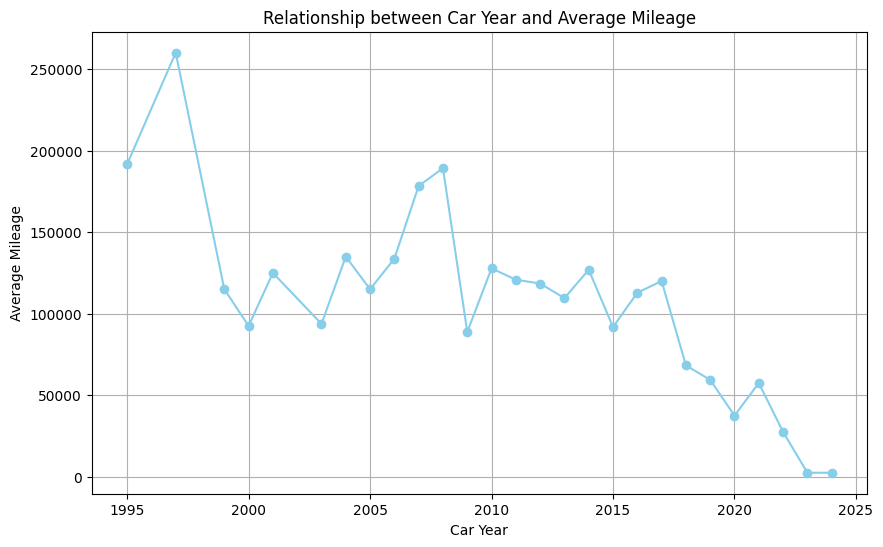

In [3]:
year_mileage = {}
for car in car_data:
    year = car["year"]
    mileage_range = car["mileage"]
    if "Undefined" in mileage_range or "undefined" in mileage_range:
        continue

    lower_mileage, upper_mileage = map(int, mileage_range.split(" - "))

    average_mileage = (lower_mileage + upper_mileage) / 2

    if year in year_mileage:
        year_mileage[year]["total_mileage"] += average_mileage
        year_mileage[year]["count"] += 1
    else:
        year_mileage[year] = {"total_mileage": average_mileage, "count": 1}

average_mileage = [
    (year, data["total_mileage"] / data["count"]) for year, data in year_mileage.items()
]


average_mileage.sort(key=lambda x: x[0])

years, mileages = zip(*average_mileage)

plt.figure(figsize=(10, 6))
plt.plot(years, mileages, marker="o", color="skyblue", linestyle="-")
plt.title("Relationship between Car Year and Average Mileage")
plt.xlabel("Car Year")
plt.ylabel("Average Mileage")
plt.grid(True)
plt.show()